In [7]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('insurance.csv')

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
pd.set_option('display.max_rows', 100)

In [17]:
print(data.shape)

(1338, 7)


In [22]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [26]:
data['charges'] = data['charges'].astype('int64')

In [29]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13269.928999
std,14.049960,6.098187,1.205493,12110.012755
min,18.000000,15.960000,0.000000,1121.000000
25%,27.000000,26.296250,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9381.500000
75%,51.000000,34.693750,2.000000,16639.250000
max,64.000000,53.130000,5.000000,63770.000000


In [27]:
data.describe(include=['object', 'bool'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [28]:
data['charges'].value_counts()

7160     2
13224    2
1137     2
2203     2
13143    2
        ..
16420    1
8891     1
37607    1
9549     1
13831    1
Name: charges, Length: 1284, dtype: int64

In [30]:
data['bmi'].value_counts(normalize=True)

32.300    0.009716
28.310    0.006726
31.350    0.005979
30.800    0.005979
30.875    0.005979
            ...   
20.100    0.000747
29.545    0.000747
37.900    0.000747
25.520    0.000747
24.090    0.000747
Name: bmi, Length: 548, dtype: float64

# SORT

In [34]:
data.sort_values(by='region',ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884
304,57,female,38.0,2,no,southwest,12646
861,38,female,28.0,3,no,southwest,7151
864,51,male,25.4,0,no,southwest,8782
865,40,male,29.9,2,no,southwest,6600


In [35]:
data.sort_values(by=['sex', 'children'], ascending=[True, False]).head()

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687
166,20,female,37.000,5,no,southwest,4830
438,52,female,46.750,5,no,southeast,12592
568,49,female,31.900,5,no,southwest,11552
937,39,female,24.225,5,no,northwest,8965


# Indexing and Retrieving Data

We will use this to answer the question: what is the average age of the users in our data frame?

In [48]:
data['age'].mean()

39.20702541106129

We will use this to answer the question: what are the average values of numerical signs among users with children?

In [57]:
data[data['children'] == 1].mean()

age            39.453704
bmi            30.623148
children        1.000000
charges     12730.706790
dtype: float64

Having combined the previous two types of indexation, we will answer the question: how much is the average age of users and the number of their children?

In [56]:
data[data['children'] == 1]['age'].mean()

39.4537037037037

In [58]:
data.loc[0:5, 'age':'bmi']

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880
5,31,female,25.740


In [59]:
data.iloc[0:5, 0:3]

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880


In [60]:
data[-1:]

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141


# Applying Functions to Cells, Columns, and Rows

### Applying a function to each column: apply

In [61]:
data.apply(np.max) 

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges         63770
dtype: object

In [65]:
d = {'no' : False, 'yes' : True}
data['smoker'] = data['smoker'].map(d)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,NaN,southwest,16884
1,18,male,33.770,1,NaN,southeast,1725
2,28,male,33.000,3,NaN,southeast,4449
3,33,male,22.705,0,NaN,northwest,21984
4,32,male,28.880,0,NaN,northwest,3866


In [66]:
data = data.replace({'smoker': d})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,NaN,southwest,16884
1,18,male,33.770,1,NaN,southeast,1725
2,28,male,33.000,3,NaN,southeast,4449
3,33,male,22.705,0,NaN,northwest,21984
4,32,male,28.880,0,NaN,northwest,3866


# Data grouping

In [70]:
data.groupby(by=grouping_columns)[sex].function()

NameError: name 'grouping_columns' is not defined

In [75]:
columns_to_show = ['sex', 'age', 'region']
data.groupby(['children'])[columns_to_show].describe(percentiles=[])

age                                        
          count       mean        std   min   50%   max
children                                               
0         574.0  38.444251  16.436228  18.0  36.0  64.0
1         324.0  39.453704  12.067445  18.0  40.0  64.0
2         240.0  39.445833  11.588715  18.0  40.0  64.0
3         157.0  41.566879  12.206174  18.0  41.0  64.0
4          25.0  39.000000  12.138094  18.0  39.0  61.0
5          18.0  35.611111  10.123583  19.0  39.0  52.0

In [76]:
columns_to_show = ['sex', 'age', 'region']
data.groupby(['children'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age                     
               mean        std amin amax
children                                
0         38.444251  16.436228   18   64
1         39.453704  12.067445   18   64
2         39.445833  11.588715   18   64
3         41.566879  12.206174   18   64
4         39.000000  12.138094   18   61
5         35.611111  10.123583   19   52

# Summary tables

In [77]:
pd.crosstab(data['sex'], data['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [78]:
pd.crosstab(data['sex'], data['children'], normalize=True)

children,0,1,2,3,4,5
sex,,,,,,
female,0.215994,0.118087,0.088939,0.057549,0.008221,0.005979
male,0.213004,0.124066,0.090433,0.059791,0.010463,0.007474


Let's see the average charges for men and women

In [79]:
data.pivot_table(['charges'], 
['sex'], aggfunc='mean').head(10)

,charges
sex,
female,12569.069486
male,13956.273669


### The first attempts to predict outflow

# У МЕНЯ ТУТ НЕ ВЫШЕЛ ГРАФИК :( ПОДСКАЖИТЕ, КАК ПРАВИЛЬНО

In [91]:
pd.crosstab(data['age'], data['sex'], margins=True)

sex,female,male,All
age,,,
18,33,36,69
19,33,35,68
20,14,15,29
21,13,15,28
22,13,15,28
23,14,14,28
24,14,14,28
25,13,15,28
26,13,15,28


# Demonstration of the basic methods of Seaborn and Plotly

In [60]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [61]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
data = data.dropna()
print(data.shape)

(1338, 7)


In [63]:
useful_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data[useful_cols].head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Build a graph of charges versus age

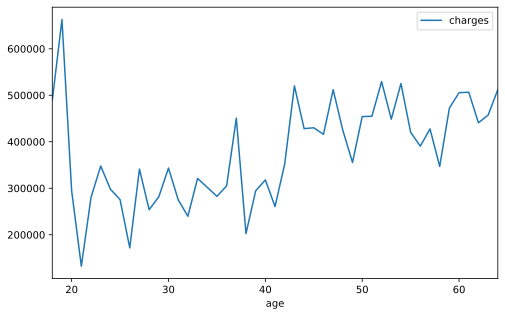

In [64]:
value_data = data[[x for x in data.columns if 'charges' in x] + ['age']]
value_data.groupby('age').sum().plot()

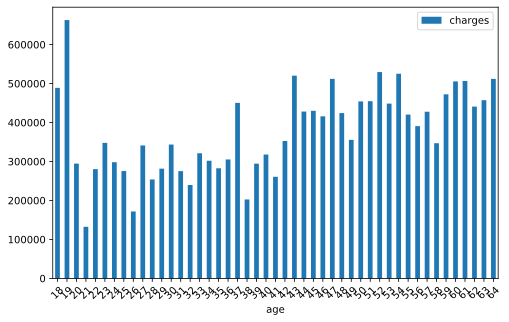

In [65]:
value_data.groupby('age').sum().plot(kind='bar', rot=45)

# Seaborn

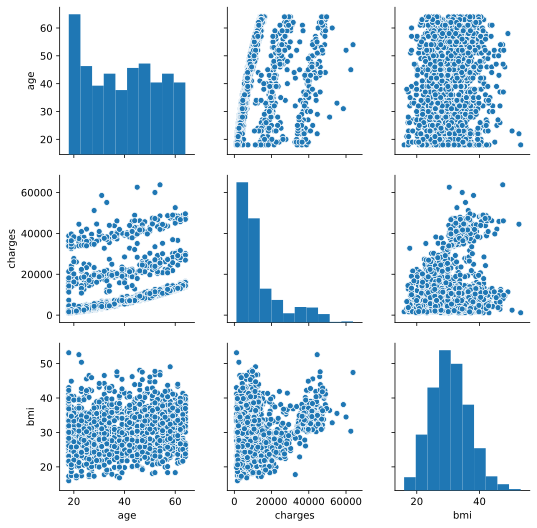

In [123]:
cols = ['age', 'charges','bmi']
sns_plot = sns.pairplot(data[cols])
sns_plot.savefig('pairplot.png')

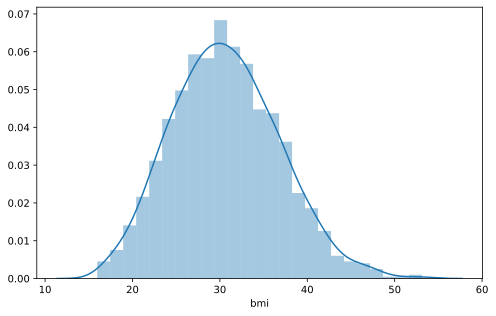

In [49]:
sns.distplot(data.bmi)

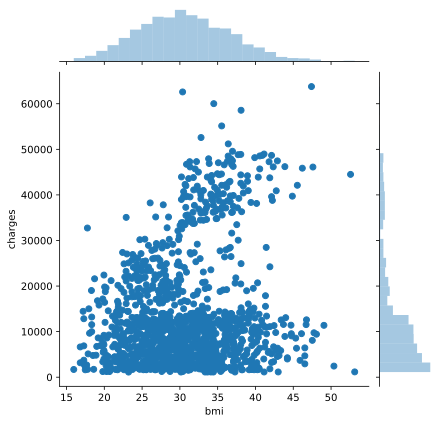

In [50]:
sns.jointplot(data.bmi,data.charges)

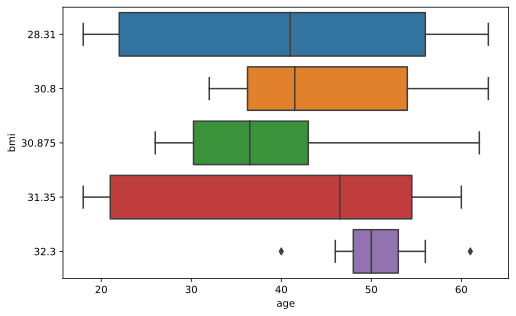

In [48]:
top = data.bmi.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="bmi", x="age", data=data[data.bmi.isin(top)], orient="h")

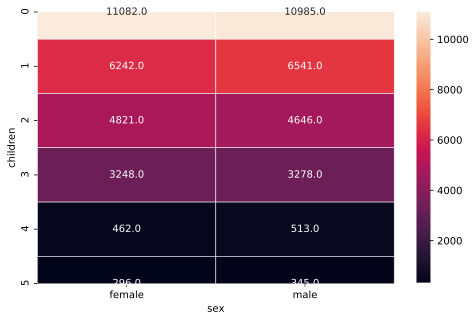

In [47]:
platform = data.pivot_table(
                        index='children', 
                        columns='sex', 
                        values='age', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform, annot=True, fmt=".1f", linewidths=.5)

# Plotly

In [56]:
pip install cufflinks plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [58]:
data = []
for Region in data.region.unique():
    data.append(
        go.Box(y=data[data.region==region].age, name=Region)
    )

# визуализируем данные
iplot(data, show_link = False)

AttributeError: 'list' object has no attribute 'region'

# Visual Data Analysis Example

In [ ]:
data = pd.read_csv('insurance.csv')
data.info()

In [ ]:
data['sex'].value_counts()

In [ ]:
data['sex'].value_counts().plot(kind='bar', label='sex')
plt.legend()
plt.title('Распределение female/male');

In [ ]:
corr_matrix = data.drop(['region', 'smoker', 'sex','age'], axis=1).corr()

In [ ]:
sns.heatmap(corr_matrix);

In [ ]:
features = list(set(data.columns) - set(['age', 'bmi', 'children', 'charges']))
data[features].hist(figsize=(20,12));

In [ ]:
sns.pairplot(data[features + ['age']], hue='age');

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='children', y=feat, data=data, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('children')
    axes[idx / 4, idx % 4].set_ylabel(feat);

# Peeping into n-dimensional space with t-SNE

In [263]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### Finding attribute combinations based on knowledge of the nature of the source data is called feature engineering.

The above are data on certain people, depending on their characteristics. 
# What are we trying to understand?
1. Is there a connection between parental age and the number of children?    

We will answer these questions using only linear regression.

# Model selection

In [39]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [40]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


ValueError: scatter requires x column to be numeric

<Figure size 576x360 with 0 Axes>

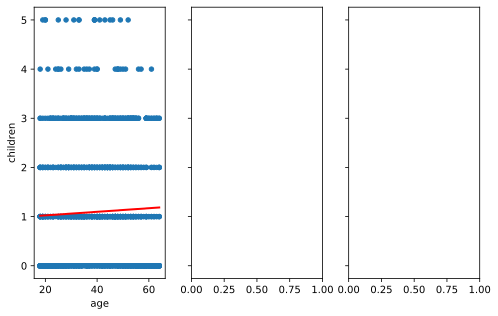

In [44]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Зависимость от возраста',fontsize=20)
fig, axes = plt.subplots(1, 3, sharey=True)
y_col = 'children'
for i, x_col in enumerate(data.columns.drop(y_col)):
    data.plot.scatter(x_col, y_col, ax=axes[i])
    
    lm = LinearRegression().fit(
        data[x_col].values.reshape(-1, 1), 
        data[y_col].values.reshape(-1, 1)
    )
    xs = np.array([data[x_col].min(), data[x_col].max()]).reshape(-1, 1)
    ys = lm.predict(xs)
    axes[i].plot(xs, ys, c='r', linewidth=2)

## t-statistcs, p-value,  𝑅2 , RSE, F-statistics

So, we have a linear model and we can calculate the coefficients. Find them (and some static information about the model) using the statsmodel library.

In [26]:
est = smf.ols('bmi ~ age + children + charges', data).fit()
est_res = est.summary()
est_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,28.5231,0.503,56.739,0.000,27.537,29.509
age,0.0238,0.012,1.955,0.051,-8e-05,0.048
children,-0.0099,0.136,-0.073,0.942,-0.276,0.257
charges,9.168e-05,1.42e-05,6.472,0.000,6.39e-05,0.000


## Проверка гипотезы (t-statistics и p-value)

Using standard errors, we can test hypotheses. The most popular type of verification is a comparison of the null and alternative hypotheses:

In [27]:
est_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,28.5231,0.503,56.739,0.000,27.537,29.509
age,0.0238,0.012,1.955,0.051,-8e-05,0.048
children,-0.0099,0.136,-0.073,0.942,-0.276,0.257
charges,9.168e-05,1.42e-05,6.472,0.000,6.39e-05,0.000


In our case, all parameters except children and age have a small 𝑝 -value. Those. there is a linear relationship between children and age.

Those. we minimize RSE and maximize 𝑅2. ∈2∈ [0,1] is a relative value, the closer to 1, the better.

In [29]:
three_x_lm = smf.ols('bmi ~ age + children', data).fit()
rss = np.sum(three_x_lm.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (data.shape[0] - 3 - 1)))
print("R^2:", three_x_lm.rsquared)

RSS: 49123.241318909655
RSE: 6.06827973808825
R^2: 0.01200636889472484


The simpler the model, the better it generalizes. Therefore, in our example, a model in which there is only age and children

# F-statistics

The 𝐹 -test indicates that at least one parameter from 𝛽1, 𝛽2, 𝛽3 is not zero.

In [31]:
print("F:", est.fvalue)
print("p-value:", est.f_pvalue)

F: 19.535819978697702
p-value: 2.134159508947191e-12


## Nonlinear dependence

So, we have shown that we do not need charges. Let's see what we got.

In [32]:
data.drop(['charges'], axis=1).describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [34]:
lm = LinearRegression().fit(
    data[['age', 'children']].as_matrix(),
    data["bmi"]
)

In [37]:
# Create a coordinate grid
age = np.arange(0,1)
children = np.arange(0,1)

B1, B2 = np.meshgrid(age, children, indexing='xy')
Z = np.zeros((age.size, children.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(lm.intercept_ + B1[i,j] * lm.coef_[0] + B2[i,j] * lm.coef_[1])

Text(0.5, 0, 'bmi')

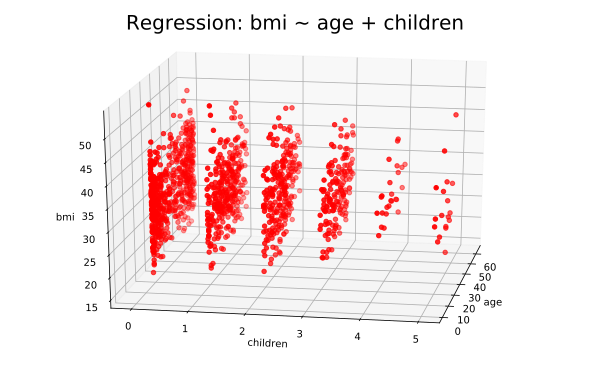

In [45]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Regression: bmi ~ age + children', fontsize=20)

ax = axes3d.Axes3D(fig, azim=10, elev=20)
ax.plot_surface(B1, B2, Z, rstride=5, cstride=5, alpha=0.3, cmap=plt.cm.brg)
ax.scatter3D(data.age, data.children, data.bmi, c='r')
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xlabel('age')
ax.set_ylabel('children')
ax.set_zlabel('bmi')

Text(0.5, 0, 'bmi')

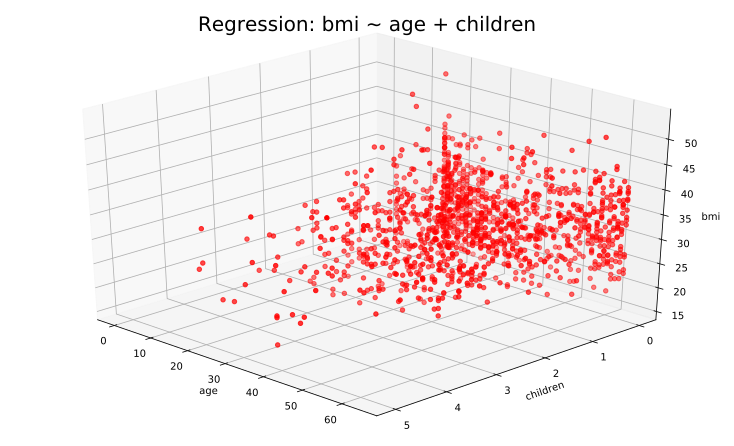

In [46]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: bmi ~ age + children', fontsize=20)

ax = axes3d.Axes3D(fig, azim=135, elev=30)
ax.plot_surface(B1, B2, Z, rstride=5, cstride=5, alpha=0.3, cmap=plt.cm.brg)
ax.scatter3D(data.age, data.children, data.bmi, c='r')
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xlabel('age')
ax.set_ylabel('children')
ax.set_zlabel('bmi')

As can be seen from the image, the approximating plane overestimates the values of bmi for cases when the points are next to one of the axes (i.e., only one parameter), and underestimates bmi in the case when the children are divided between two parameters. Therefore, we observe non-linear behavior (synergy / interaction effect).

Summing up, I want to add the following
1. You can see that the older the person, the greater the number of children, however, general statistics show that the number of childless people predominates, if you look closely at all statistics.
2. More children slopes women than men.
3. There is a relationship between сharges and bmi, on the principle that the larger one the larger and the other.
4. People with expenses up to 20,000 are more likely to be overweight.
5. The most popular bmi category is 30, which means overweight.
6. it was noted that women have less male expenses (most likely this is due to the fact that women receive less).


This is what the analysis showed me. 